In [1]:
import pandas as pd
import pickle
import numpy as np

## Load the data frame, and the dictionary

In [2]:
df = pd.read_csv("../../data/compressed_Iowa_Alcohol.csv")
df.head()

,Date,Store Number,County Number,Category,Vendor Number,Item Number,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20


In [3]:
with open("../../data/all_dict.dat", "rb") as f:
    all_dict = pickle.load(f)

## Replace the spaces and "(" with "_"

In [4]:
col_names = df.columns
col_names_cleaned = col_names.map(lambda x: x.lower().replace(" number", "").replace(" ", "_").replace("(", "").replace(")", ""))
print(col_names)
print(col_names_cleaned)
df.columns = col_names_cleaned
df.head()

Index(['Date', 'Store Number', 'County Number', 'Category', 'Vendor Number',
       'Item Number', 'Pack', 'Bottle Volume (ml)', 'State Bottle Cost',
       'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')
Index(['date', 'store', 'county', 'category', 'vendor', 'item', 'pack',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars'],
      dtype='object')


,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20


## calculate the total volume sold, multiple bottle_volume_ml with bottles_sold

In [5]:
import numpy as np
df["volume_sold_ml"] = np.multiply(df["bottle_volume_ml"], df["bottles_sold"])
df.head()

,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_ml
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84,4500
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68,9000
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02,5250
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300


## split the date into the year

In [8]:
df["year"] = df.apply(lambda x: x["date"].split("/")[-1], axis=1)
df["day"] = df.apply(lambda x: x["date"].split("/")[-2], axis=1)
df["month"] = df.apply(lambda x: x["date"].split("/")[-3], axis=1)
df.head()

,date,store,county,category,vendor,item,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_ml,year,month,day
0,11/20/2015,2191,56.0,NaN,255.0,297,6,750,$18.09,$27.14,6,$162.84,4500,2015,11,20
1,11/21/2015,2205,73.0,NaN,255.0,297,6,750,$18.09,$27.14,12,$325.68,9000,2015,11,21
2,11/16/2015,3549,56.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300,2015,11,16
3,11/04/2015,2513,52.0,NaN,65.0,237,3,1750,$35.55,$53.34,3,$160.02,5250,2015,11,04
4,11/17/2015,3942,86.0,NaN,130.0,249,20,150,$6.40,$9.60,2,$19.20,300,2015,11,17


In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

## calculate the total alcohol sold per year

In [12]:
total_alcohol_sold = pd.DataFrame({"total_alcohol_sold": df.groupby(["year", "month"])["volume_sold_ml"].sum()}).reset_index()
total_alcohol_sold["total_sold_litre"] = total_alcohol_sold.apply(lambda x: x["total_alcohol_sold"]/1000, axis=1)
total_alcohol_sold

,year,month,total_alcohol_sold,total_sold_litre
0,2012,01,1212083715,1212083.715
1,2012,02,1386566898,1386566.898
2,2012,03,1352874485,1352874.485
3,2012,04,1499569186,1499569.186
4,2012,05,1709434658,1709434.658
5,2012,06,1618028477,1618028.477
6,2012,07,1548760853,1548760.853
7,2012,08,1626639449,1626639.449
8,2012,09,1308898392,1308898.392
9,2012,10,2362804354,2362804.354


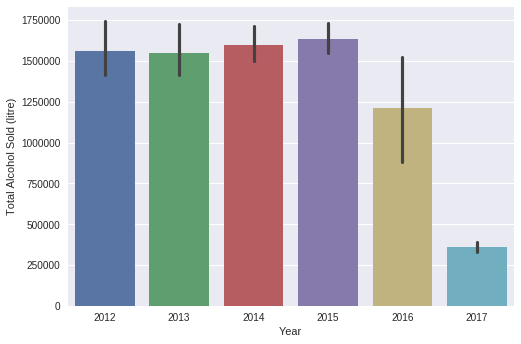

In [13]:
sns.barplot(x="year", y="total_sold_litre", data=total_alcohol_sold)
plt.xlabel("Year")
plt.ylabel("Total Alcohol Sold (litre)")
plt.show()

## Notes:
* 2016 has a lower consumption than every other year
* 2012 - 2015 saw a steady increase in consumption
* Should I drop 2017 ?

## Lets plot this per month, per year

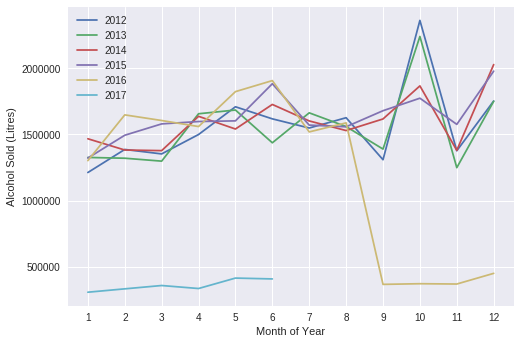

In [25]:
years = ["2012", "2013", "2014", "2015", "2016", "2017"]
i = 0
for year in years:
    year_data = total_alcohol_sold[total_alcohol_sold["year"] == year]
    plt.plot(year_data.month, year_data.total_sold_litre)
plt.legend(years)
plt.xticks(list(range(1, 13)))
plt.ylabel("Alcohol Sold (Litres)")
plt.xlabel("Month of Year")
plt.show()